#  Keras Intro: Shallow Models

Keras Documentation: https://keras.io

In this notebook we explore how to use Keras to implement 2 traditional Machine Learning models:
- **Linear Regression** to predict continuous data
- **Logistic Regression** to predict categorical data

## Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 0. Load data

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


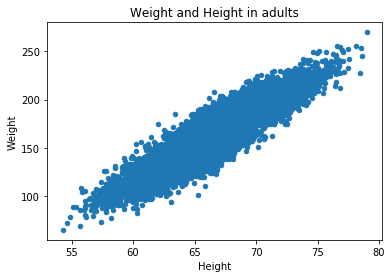

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

### 1. Create Train/Test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Height']].values
y = df['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

### 2. Train Linear Regression Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(1, input_shape=(1,)))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(Adam(lr=0.9), 'mean_squared_error')

In [12]:
# batch_size: Integer or `None`. Number of samples per gradient update. If unspecified, `batch_size` will default to 32.
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
7000/7000 [==============================] - 2s 239us/step - loss: 1861.4347
Epoch 2/40
7000/7000 [==============================] - 1s 90us/step - loss: 581.2421
Epoch 3/40
7000/7000 [==============================] - 1s 88us/step - loss: 565.5832
Epoch 4/40
7000/7000 [==============================] - 1s 89us/step - loss: 538.1345
Epoch 5/40
7000/7000 [==============================] - 1s 87us/step - loss: 502.4989
Epoch 6/40
7000/7000 [==============================] - 1s 89us/step - loss: 487.1274
Epoch 7/40
7000/7000 [==============================] - 1s 89us/step - loss: 450.1670
Epoch 8/40
7000/7000 [==============================] - 1s 87us/step - loss: 420.6361
Epoch 9/40
7000/7000 [==============================] - 1s 90us/step - loss: 379.8821
Epoch 10/40
7000/7000 [==============================] - 1s 92us/step - loss: 382.1681
Epoch 11/40
7000/7000 [==============================] - 1s 87us/step - loss: 335.2072
Epoch 12/40
7000/7000 [===========================

### 3. Evaluate Model Performance

In [13]:
from sklearn.metrics import r2_score

In [14]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [15]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.791
The R2 score on the Test set is:	0.790


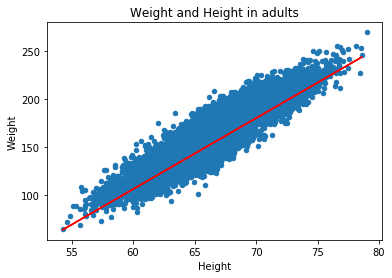

In [16]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X_test, y_test_pred, color='red')

In [20]:
W, B = model.get_weights()

In [21]:
W

array([[7.41496]], dtype=float32)

In [22]:
B

array([-338.75153], dtype=float32)

# Classification

### 0. Load Data

In [23]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [24]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


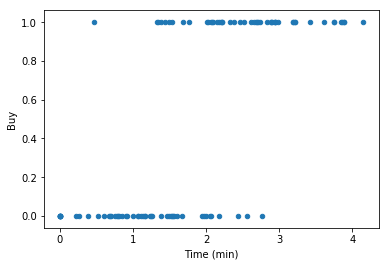

In [25]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

### 1. Create Train/Test split

In [26]:
X = df[['Time (min)']].values
y = df['Buy'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

### 2. Train Logistic Regression Model

In [28]:
model = Sequential()

In [29]:
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
# optimizing binary_crossentropy and keep track of the accuracy

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
70/70 [==============================] - 0s 2ms/step - loss: 0.4372 - acc: 0.7857
Epoch 2/40
70/70 [==============================] - 0s 188us/step - loss: 0.4289 - acc: 0.7857
Epoch 3/40
70/70 [==============================] - 0s 188us/step - loss: 0.4262 - acc: 0.7714
Epoch 4/40
70/70 [==============================] - 0s 225us/step - loss: 0.4363 - acc: 0.7714
Epoch 5/40
70/70 [==============================] - 0s 191us/step - loss: 0.4694 - acc: 0.7714
Epoch 6/40
70/70 [==============================] - 0s 196us/step - loss: 0.4295 - acc: 0.7857
Epoch 7/40
70/70 [==============================] - 0s 274us/step - loss: 0.4287 - acc: 0.8000
Epoch 8/40
70/70 [==============================] - 0s 197us/step - loss: 0.4231 - acc: 0.7714
Epoch 9/40
70/70 [==============================] - 0s 189us/step - loss: 0.4225 - acc: 0.7714
Epoch 10/40
70/70 [==============================] - 0s 187us/step - loss: 0.4263 - acc: 0.7714
Epoch 11/40
70/70 [==============================] 

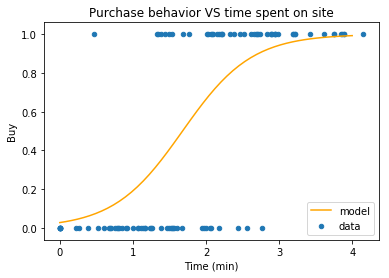

In [36]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

t = np.linspace(0, 4)
ax.plot(t, model.predict(t), color='orange')

plt.legend(['model', 'data'])

### 3. Evaluate Model Performance

#### Accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [39]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The train accuracy score is 0.800
The test accuracy score is 0.933


#### Confusion Matrix & Classification Report

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, y_test_pred)

array([[15,  1],
       [ 1, 13]])

In [42]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [43]:
pretty_confusion_matrix(y_test, y_test_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,15,1
Buy,1,13


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        16
          1       0.93      0.93      0.93        14

avg / total       0.93      0.93      0.93        30



## Exercise

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size, use `random_state=0` for consistency with classmates
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss decreasing?
- try to improve your model with these experiments:
    - normalize the input features:
        - divide sqft by 1000
        - divide age by 10
        - divide price by 100000
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set